In [1]:
import argparse

import torch

import ptychi.api as api
from ptychi.api.task import PtychographyTask

from ptychi.utils import get_suggested_object_size, get_default_complex_dtype, generate_initial_opr_mode_weights

import test_utils as tutils
import matplotlib.pyplot as plt
import os
import numpy as np
import cupy as cp
os.environ["PTYCHO_CI_DATA_DIR"] = "/home/beams8/TOMO/vnikitin/pty-chi2/ci_data"


In [2]:

def mshow(a, show=True, **args):
    """Plot the 2D array, handling arrays on GPU      

    Parameters
    ----------
    a : (ny, nx) float32
        2D array for visualization
    args : 
        Other parameters for imshow    
    """
    if not show:
        return

    fig, axs = plt.subplots(1, 1, figsize=(3, 3))
    im = axs.imshow(a, cmap='gray', **args)
    fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.show()


def mshow_complex(a, show=True, **args):
    """Plot the 2D array in the rectangular representation with the real and imag parts, 
    handling arrays on GPU   

    Parameters
    ----------
    a : (ny, nx) complex64
        2D array for visualization
    args : 
        Other parameters for imshow    
    """
    if not show:
        return
    if isinstance(a, cp.ndarray):
        a = a.get()
    fig, axs = plt.subplots(1, 2, figsize=(9, 3))
    im = axs[0].imshow(a.real, cmap='gray', **args)
    axs[0].set_title('real')
    fig.colorbar(im, fraction=0.046, pad=0.04)
    im = axs[1].imshow(a.imag, cmap='gray', **args)
    axs[1].set_title('imag')
    fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.show()


def mshow_polar(a, show=False, **args):
    """Plot the 2D array in the polar representation with the absolute value and phase,
    handling arrays on GPU       

    Parameters
    ----------
    a : (ny, nx) complex64
        2D array for visualization
    args : 
        Other parameters for imshow    
    """
    if not show:
        return
    fig, axs = plt.subplots(1, 2, figsize=(9, 3))
    im = axs[0].imshow(np.abs(a), cmap='gray', **args)
    axs[0].set_title('abs')
    fig.colorbar(im, fraction=0.046, pad=0.04)
    im = axs[1].imshow(np.angle(a), cmap='gray', **args)
    axs[1].set_title('phase')
    fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.show()

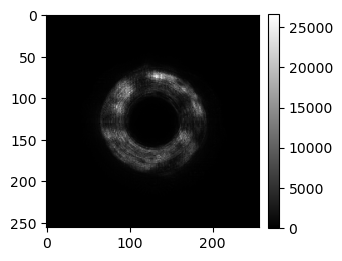

(961, 2)


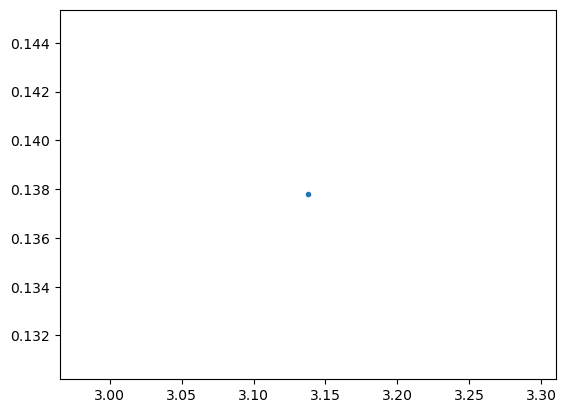

In [3]:
name = 'test_2d_ptycho_lsqml'

tutils.setup(name, cpu_only=False, gpu_indices=[0])
data, probe, pixel_size_m, positions_px = tutils.load_tungsten_data(pos_type='true')


prb = np.asarray(probe[0,0].cpu())
shifts = positions_px.swapaxes(0,1)

# data = np.sqrt(data)

# data/=np.amax(np.abs(prb))
# prb/=np.amax(np.abs(prb))

npos = data.shape[1]

mshow(data[0])
mshow_polar(prb[0])
plt.plot(shifts[0,1],shifts[0,0],'.')
print(positions_px.shape)

  0%|          | 0/8 [00:00<?, ?it/s]

Empty DataFrame
Columns: [epoch, loss]
Index: []


 12%|█▎        | 1/8 [00:00<00:05,  1.27it/s]

Empty DataFrame
Columns: [epoch, loss]
Index: []
   epoch       loss
0    0.0  92.363335


 25%|██▌       | 2/8 [00:02<00:06,  1.13s/it]

   epoch       loss
0    0.0  92.363335
   epoch       loss
0    0.0  92.363335
1    1.0  25.797239


 38%|███▊      | 3/8 [00:03<00:06,  1.24s/it]

   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239


 50%|█████     | 4/8 [00:04<00:05,  1.29s/it]

   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194


 62%|██████▎   | 5/8 [00:06<00:03,  1.32s/it]

   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
4    4.0  18.836021


 75%|███████▌  | 6/8 [00:07<00:02,  1.34s/it]

   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
4    4.0  18.836021
   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
4    4.0  18.836021
5    5.0  17.908730


 88%|████████▊ | 7/8 [00:09<00:01,  1.40s/it]

   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
4    4.0  18.836021
5    5.0  17.908730
   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
4    4.0  18.836021
5    5.0  17.908730
6    6.0  17.238205


100%|██████████| 8/8 [00:10<00:00,  1.32s/it]

   epoch       loss
0    0.0  92.363335
1    1.0  25.797239
2    2.0  21.078239
3    3.0  20.064194
4    4.0  18.836021
5    5.0  17.908730
6    6.0  17.238205


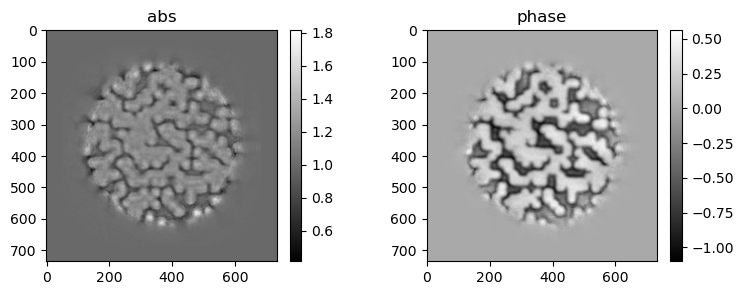

In [ ]:
probe = probe[:, [0], :, :]

options = api.FifthRuleOptions()

options.data_options.data = data

options.object_options.initial_guess = torch.ones([1, *get_suggested_object_size(positions_px, probe.shape[-2:], extra=100)], dtype=get_default_complex_dtype())
options.object_options.pixel_size_m = pixel_size_m
options.object_options.optimizable = True

options.probe_options.initial_guess = probe
options.probe_options.optimizable = True
options.probe_options.rho = 10

options.probe_position_options.position_x_px = positions_px[:, 1]
options.probe_position_options.position_y_px = positions_px[:, 0]
options.probe_position_options.optimizable = False

options.reconstructor_options.batch_size = 96
options.reconstructor_options.num_epochs = 8

task = PtychographyTask(options)
task.run()

recon = task.get_data_to_cpu('object', as_numpy=True)[0]


mshow_polar(recon,mshow)